# Gillespie

In [ ]:
const expRand = (lambda: number) =>
    -Math.log(1 - Math.random()) * lambda

abstract class Gil {
    time = 0

    abstract actions: {
        p: number,
        do(): void,
    }[]

    step() {
        const totalP = this.actions.reduce((a, b) => a + b.p, 0)

        if (totalP == 0) return

        this.time += expRand(1 / totalP)

        const rand = Math.random() * totalP

        let cum = 0
        const action = this.actions.find(action => {
            cum += action.p
            return rand <= cum
        })!

        action.do()
    }

    simulate(n: number) {
        return Array.from({ length: n }, _ => (
            this.step(),
            structuredClone(this)
        ))
    }
}

class SIR extends Gil {
    beta = 0.3
    gamma = 0.1
    N = 1000
    S = 999
    I = 1
    R = 0

    get actions() {
        const { beta, gamma, N, S, I } = this
        return [
            {
                p: beta * S * I / N,
                do: () => {
                    this.S -= 1
                    this.I += 1
                }
            },
            {
                p: gamma * I,
                do: () => {
                    this.I -= 1
                    this.R += 1
                }
            }
        ]
    }
}

const model = new SIR()

const result = model.simulate(10000)

result

[
  {
    time: 3.5378019966799426,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 998,
    I: 2,
    R: 0
  },
  {
    time: 4.648122095132331,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 997,
    I: 3,
    R: 0
  },
  {
    time: 5.036690269914903,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 997,
    I: 2,
    R: 1
  },
  {
    time: 5.315519760913999,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 996,
    I: 3,
    R: 1
  },
  {
    time: 7.682731012692977,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 995,
    I: 4,
    R: 1
  },
  {
    time: 7.842602233182455,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 994,
    I: 5,
    R: 1
  },
  {
    time: 8.028100060299042,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 993,
    I: 6,
    R: 1
  },
  {
    time: 8.264738445673814,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 992,
    I: 7,
    R: 1
  },
  {
    time: 8.96331068373246,
    beta: 0.3,
    gamma: 0.1,
    N: 1000,
    S: 992,
    I

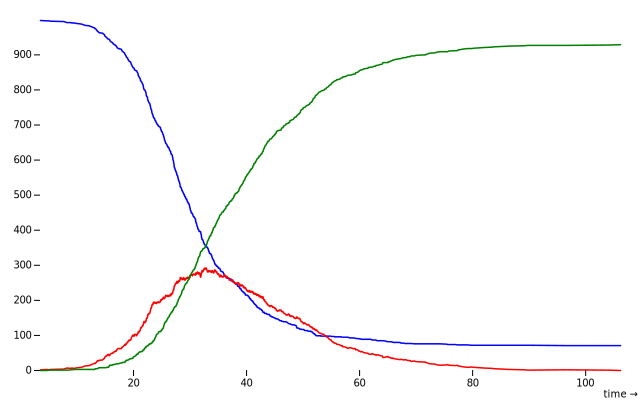

In [ ]:
import { document } from "jsr:@ry/jupyter-helper@0.2.0"
import * as Plot from "https://esm.sh/@observablehq/plot@0.6.17"

Plot.plot({
    marks: [
        Plot.line(result, {
            x: "time",
            y: "S",
            stroke: "blue",
        }),
        Plot.line(result, {
            x: "time",
            y: "I",
            stroke: "red",
        }),
        Plot.line(result, {
            x: "time",
            y: "R",
            stroke: "green",
        }),
    ],
    document,
})